# **Ejemplo word2vec**

Vamos a emplear la librería **Gensim** con el propósito de entrenar un *word embedding* mediante el algoritmo Word2Vec estudiado en la parte teórica. Para ello, lo primero que vamos a hacer es utilizar como Corpus, el texto que tenemos en las variables ```samples``` y ```long_sample```. Con dicho propósito vamos a unir ambos en una variable denominada ```corpus```:

In [ ]:
long_sample = ["""Natural language processing (NLP) is a subfield of linguistics,
     computer science, and artificial intelligence concerned with the interactions between computers and human language,
     in particular how to program computers to process and analyze large amounts of natural language data.
     The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.
     The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves."""]

# Imaginemos cada entrada en samples como un documento
samples = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey"
]

corpus = [i.split() for i in samples]
word_long_sample = [i.split() for i in long_sample]
print(corpus)
corpus.append(word_long_sample[0])
print(corpus)

[['Human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications'], ['A', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time'], ['The', 'EPS', 'user', 'interface', 'management', 'system'], ['System', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS'], ['Relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement'], ['The', 'generation', 'of', 'random', 'binary', 'unordered', 'trees'], ['The', 'intersection', 'graph', 'of', 'paths', 'in', 'trees'], ['Graph', 'minors', 'IV', 'Widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering'], ['Graph', 'minors', 'A', 'survey']]
[['Human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications'], ['A', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time'], ['The', 'EPS', 'user', 'interface', 'management', 'system'], ['System', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS'], ['Relation', 'of', 'user

A continuación vamos a traer el método **Word2Vec** implementado en la librería **Gensim** con el objetivo de entrenar nuestro ***word embedding***. Analiza con atención el siguiente código y comenta cada una de las instrucciones haciendo uso de la documentación de **[Gensim](https://radimrehurek.com/gensim_3.8.3/models/word2vec.html)**.

- ¿Que **dimensionalidad** tiene **por defecto** el **vector** que codifica cada palabra?

- ¿Que **significado** tiene el parámetro de entrada **```min_count```**?

**Sol.** La dimensionalidad por defecto es ```size=100```- Mediante el parámetro ```min_count``` fijamos cuál es el número de ocurrencias mínimo de una palabra que debe darse en el texto para considerar dicha palabra en el Corpus de entrenamiento.

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(corpus, min_count=1)
print(model)
words = list(model.wv.vocab)
print(words)
print(model['computer'])

Ahora que tenemos nuestro **word embedding entrenado**, vamos a tratar de visualizarlo.

- ¿Por que es necesario emplear una reducción de dimensionalidad con **PCA**?

- ¿Que **conclusiones** se pueden extraer de la **gráfica**?

- Realiza **varias experimentaciones** cambiando la dimensionalidad de dicho vector. Emplea valores de **```size=32```** y **```size=256```**. ¿Varía el resultado de la representación?

- ¿Que ocurre si variamos el parámetro **```min_count=2```**?

Es necesario reducir la dimensionalidad para poder representar gráficamente cada uno de los vectores de ```dim``` dimensiones por los que está representadas nuestras palabras. Disminuimos a 2 dimensiones únicamente con propósitos de visualización pero para entrenar la red se emplearán las ```dim``` dimensiones. De la gráfica podemos extraer que algunas palabras con significados parecidos se encuentran cercanas en la representación. No obstante al visualizar en dos dimensiones está complicado extraer conclusiones. Además hemos entrenado con un corpus muy pequeño.  Por supuesto, la representación es distinta cuando variamos el parámetro ```dim```. Contra más grande es el parámetro ```min_count```, más se reduce nuestro corpus de entrenamiento.

<ipython-input-21-7c65ca20d907>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


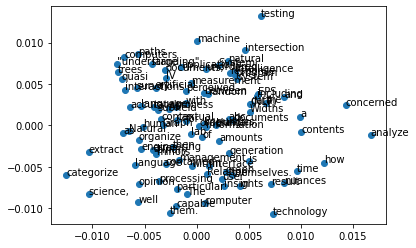

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Obtenemos las representaciones de todas las palabras de nuestro Corpus
X = model[model.wv.vocab]

# Reducimos dimensionalidad
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Mostramos la distribución de nuestras palabras
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Como hemos visto durante el ejercicio, es muy **complicado** poder llevar a cabo **una buena visualización** de la representación de las palabras de nuestro Corpus, debido principalmente a **dos razones**: las **limitaciones** en cuanto a **tiempo de entrenamiento** por motivos didácticos (estamos empleando un **Corpus pequeño**) y la **forma** en la que llevamos a cabo la **visualización**. Para hacernos una mejor idea de la **potencia del algoritmo word2Vec** vamos a inspeccionar un recurso que va a eliminar nuestras dos principales limitaciones:

https://projector.tensorflow.org/

Este recurso nos brinda entrenamientos de **word2Vec** con **Corpus mucho más grandes** del que hemos empleado a lo largo del ejercicio. Además nos proporciona **herramientas de visualización interactiva** y nos deja escoger entre **varios mecanísmos de reducción de la dimensionalidad**. Puedes navegar sobre la nube de puntos e ir viendo que palabras están mas cercanas a otras. Adicionalmente, en el panel derecho, nos ofrece una **herramienta de búsqueda** de lo más potente.